## üéì Persona : L√©a, jeune investisseuse √©tudiante

**Profil :**
- üë© 24 ans, dipl√¥m√©e de l'EM Lyon
- üíº Premi√®re exp√©rience professionnelle apr√®s 2 ans d'alternance
- üí∞ Aide parentale pour le financement + √©pargne personnelle (~15 000 ‚Ç¨)
- üéØ Objectif : r√©aliser un **premier investissement locatif** dans une **ville √©tudiante dynamique**

---

### üí° Objectif d'investissement
> Trouver le **meilleur investissement locatif √©tudiant** possible avec un **budget global de 200 000 ‚Ç¨**,  
> en ciblant un **studio √† Lille**, tout en comparant bri√®vement avec un **T1 √† Angers ou Nancy**.

---

### üí∞ Hypoth√®ses financi√®res
| √âl√©ment | Montant estim√© |
|----------|----------------|
| Prix d'achat vis√© | 160 000 ‚Äì 180 000 ‚Ç¨ |
| Apport personnel | 15 000 ‚Ç¨ |
| Pr√™t immobilier estim√© | 180 000 ‚Ç¨ sur 20 ans |
| Budget total (frais inclus) | **‚âà 200 000 ‚Ç¨** |
| Objectif de rentabilit√© brute | **‚â• 5 %** |

---

### üèôÔ∏è Cibles principales
| Ville | Type de bien | Prix moyen au m¬≤ | Loyer moyen mensuel | Observations |
|-------|---------------|------------------|---------------------|---------------|
| **Lille** | Studio (20‚Äì25 m¬≤) | ~4 500 ‚Ç¨/m¬≤ | 550‚Äì600 ‚Ç¨ | March√© √©tudiant tendu, forte demande locative |
| **Angers** | T1 (25‚Äì30 m¬≤) | ~3 200 ‚Ç¨/m¬≤ | 450‚Äì500 ‚Ç¨ | Ville tr√®s dynamique, bonne rentabilit√© brute |
| **Nancy** | T1 (25‚Äì30 m¬≤) | ~2 800 ‚Ç¨/m¬≤ | 420‚Äì470 ‚Ç¨ | March√© abordable, bon rapport prix/rentabilit√© |

---

### üîç Besoins data de L√©a
- Identifier **les quartiers les plus rentables** √† Lille (ou dans des villes comparables)
- Comparer avec **la rentabilit√© moyenne en France**
- Analyser l'**√©volution du prix au m¬≤ et des loyers √©tudiants** depuis 5 ans
- Calculer la **rentabilit√© locative brute et nette** par quartier
- Visualiser les **zones √† forte concentration √©tudiante**
- Fournir une **recommandation finale : "o√π investir avec 200k‚Ç¨ ?"**
- √âvaluer le **taux de vacance locative** par quartier pour anticiper les p√©riodes creuses (notamment l'√©t√© o√π les √©tudiants quittent les logements)
- Analyser la **proximit√© des transports en commun** et des universit√©s/grandes √©coles pour identifier les zones les plus attractives pour les √©tudiants
- Estimer les **charges de copropri√©t√© moyennes** par type de bien et par quartier pour affiner le calcul de rentabilit√© nette
- Identifier les **opportunit√©s de biens n√©cessitant des travaux** (d√©cote √† l'achat) pour maximiser la plus-value √† long terme

---

### üß≠ Objectif du notebook
Cr√©er un outil interactif permettant √† L√©a de :
1. Comparer la rentabilit√© d'un **studio √† Lille** avec celle d'un **T1 √† Angers ou Nancy**  
2. Explorer visuellement les **zones √† potentiel locatif √©lev√©**  
3. Obtenir une **recommandation automatique** en fonction de son budget et de ses pr√©f√©rences

## Import des biblioth√®ques ##

In [4]:
!python -m pip install seaborn


In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from unidecode import unidecode
import glob
import numpy as np


### 1e vision : Analyse g√©n√©rale en France ###

Etude du prix/m^2 par grandes villes etudiantes en France. filtre = appartement, surface de 0 √† 45m^2



Partie Valentine

Filtrer le DVF avec les 20 plus grandes villes √©tudiantes de France


DVF encore optimis√© pour garder : seulement les colonnes indispensables,les 20 grandes villes √©tudiantes,les appartements de 0 √† 45 m¬≤

In [5]:
# Liste des 23 villes √©tudiantes
villes = [
    "PARIS","LYON","LILLE","TOULOUSE","BORDEAUX","MARSEILLE","MONTPELLIER","RENNES","STRASBOURG",
    "NANTES","GRENOBLE","NANCY","NICE","ANGERS","ROUEN","CLERMONT-FERRAND","CAEN","DIJON","TOURS","REIMS",
    "AJACCIO","ANNECY","TOULON"
]

# Colonnes √† conserver
colonnes_utiles = [
    "Date mutation",
    "Nature mutation",
    "Valeur fonciere",
    "Code postal",
    "Commune",
    "Type local",
    "Surface reelle bati"
]

# Liste pour stocker les donn√©es filtr√©es
data_filtree = []

print("üîÑ Lecture et filtrage du fichier DVF...")

# Lecture du fichier par morceaux
chunks = pd.read_csv("valeursfoncieres-2024.txt", sep="|", low_memory=False, chunksize=100000)

for i, chunk in enumerate(chunks):
    # Filtrer les villes √©tudiantes
    filtre = chunk[chunk["Commune"].isin(villes)]
    
    # Ne garder que les appartements
    filtre = filtre[filtre["Type local"] == "Appartement"]
    
    # Ne garder que les ventes
    filtre = filtre[filtre["Nature mutation"] == "Vente"]
    
    # Conversion et filtrage de la surface
    filtre["Surface reelle bati"] = pd.to_numeric(filtre["Surface reelle bati"], errors="coerce")
    filtre = filtre[filtre["Surface reelle bati"].between(1, 45)]
    
    # Conversion des valeurs fonci√®res
    filtre["Valeur fonciere"] = (
        filtre["Valeur fonciere"]
        .astype(str)
        .str.replace(",", ".")
        .str.replace(" ", "")
    )
    filtre["Valeur fonciere"] = pd.to_numeric(filtre["Valeur fonciere"], errors="coerce")
    
    # Supprimer les valeurs manquantes ou aberrantes
    filtre = filtre.dropna(subset=["Valeur fonciere", "Surface reelle bati"])
    filtre = filtre[filtre["Valeur fonciere"] > 0]
    
    # S√©lection des colonnes utiles
    filtre = filtre[colonnes_utiles]
    
    # Ajouter √† la liste
    if len(filtre) > 0:
        data_filtree.append(filtre)
    
    # Affichage de la progression
    if (i + 1) % 10 == 0:
        print(f"   ‚úì Trait√© {(i + 1) * 100000:,} lignes...")

# Concat√©ner toutes les donn√©es filtr√©es
print("\nüîÑ Consolidation des donn√©es...")
df = pd.concat(data_filtree, ignore_index=True)

# Calcul du prix au m¬≤
df["Prix_m2"] = df["Valeur fonciere"] / df["Surface reelle bati"]

# R√©organisation des colonnes
df = df[[
    "Commune",
    "Code postal",
    "Type local",
    "Surface reelle bati",
    "Valeur fonciere",
    "Prix_m2",
    "Date mutation"
]]

# Export du fichier final
df.to_csv("dvf_appartements_23villes_0_45m2.csv", index=False)

# R√©sum√© d√©taill√©
print("\n" + "="*60)
print("‚úÖ Traitement termin√© !")
print("="*60)
print(f"üìä Lignes conserv√©es : {len(df):,}")
print(f"üèôÔ∏è  Nombre de villes : {df['Commune'].nunique()}")
print(f"üíæ Fichier cr√©√© : dvf_appartements_23villes_0_45m2.csv")

print(f"\nüìà R√©partition par ville :")
print("-" * 60)
repartition = df.groupby("Commune").size().sort_values(ascending=False)
for ville, count in repartition.items():
    print(f"   {ville:20s} : {count:>6,} transactions")

print(f"\nüí∞ Statistiques des prix au m¬≤ :")
print("-" * 60)
print(f"   Prix moyen    : {df['Prix_m2'].mean():,.0f} ‚Ç¨/m¬≤")
print(f"   Prix m√©dian   : {df['Prix_m2'].median():,.0f} ‚Ç¨/m¬≤")
print(f"   Prix minimum  : {df['Prix_m2'].min():,.0f} ‚Ç¨/m¬≤")
print(f"   Prix maximum  : {df['Prix_m2'].max():,.0f} ‚Ç¨/m¬≤")

print("\n" + "="*60)

üîÑ Lecture et filtrage du fichier DVF...
   ‚úì Trait√© 1,000,000 lignes...
   ‚úì Trait√© 2,000,000 lignes...
   ‚úì Trait√© 3,000,000 lignes...

üîÑ Consolidation des donn√©es...

‚úÖ Traitement termin√© !
üìä Lignes conserv√©es : 22,095
üèôÔ∏è  Nombre de villes : 18
üíæ Fichier cr√©√© : dvf_appartements_23villes_0_45m2.csv

üìà R√©partition par ville :
------------------------------------------------------------
   TOULOUSE             :  3,008 transactions
   NICE                 :  2,824 transactions
   MONTPELLIER          :  1,713 transactions
   NANTES               :  1,652 transactions
   LILLE                :  1,599 transactions
   BORDEAUX             :  1,559 transactions
   ROUEN                :  1,109 transactions
   DIJON                :  1,073 transactions
   RENNES               :  1,045 transactions
   TOULON               :    949 transactions
   ANGERS               :    877 transactions
   GRENOBLE             :    864 transactions
   REIMS              

filtrer les valeurs aberrantes 

In [10]:


# Lecture du fichier
df = pd.read_csv("dvf_appartements_23villes_0_45m2.csv", low_memory=False)

print("üìä Statistiques AVANT filtrage des valeurs aberrantes :")
print(f"Nombre de lignes : {len(df):,}")
print(f"\nPrix au m¬≤ :")
print(f"  - Minimum : {df['Prix_m2'].min():,.2f} ‚Ç¨/m¬≤")
print(f"  - Maximum : {df['Prix_m2'].max():,.2f} ‚Ç¨/m¬≤")
print(f"  - Moyenne : {df['Prix_m2'].mean():,.2f} ‚Ç¨/m¬≤")
print(f"  - M√©diane : {df['Prix_m2'].median():,.2f} ‚Ç¨/m¬≤")

# Comptage des valeurs aberrantes AVANT filtrage
print(f"\n‚ö†Ô∏è Valeurs aberrantes d√©tect√©es :")
tres_bas = len(df[df['Prix_m2'] < 1000])
tres_eleves = len(df[df['Prix_m2'] > 100000])
print(f"  - Prix < 1 000 ‚Ç¨/m¬≤ : {tres_bas}")
print(f"  - Prix > 100 000 ‚Ç¨/m¬≤ : {tres_eleves}")

# FILTRAGE DES VALEURS ABERRANTES
# Crit√®res adapt√©s aux grandes villes √©tudiantes :
# - Minimum : 1 000 ‚Ç¨/m¬≤ (coh√©rent avec le march√© des grandes villes)
# - Maximum : 100 000 ‚Ç¨/m¬≤ (seuil officiel DVF)

df_filtre = df[
    (df['Prix_m2'] >= 1000) & 
    (df['Prix_m2'] <= 100000)
].copy()

# Statistiques APR√àS filtrage
print("\n" + "="*70)
print("üìä Statistiques APR√àS filtrage des valeurs aberrantes :")
print("="*70)
print(f"Nombre de lignes conserv√©es : {len(df_filtre):,}")
print(f"Nombre de lignes supprim√©es : {len(df) - len(df_filtre):,} ({100*(len(df)-len(df_filtre))/len(df):.2f}%)")

print(f"\nPrix au m¬≤ :")
print(f"  - Minimum : {df_filtre['Prix_m2'].min():,.2f} ‚Ç¨/m¬≤")
print(f"  - Maximum : {df_filtre['Prix_m2'].max():,.2f} ‚Ç¨/m¬≤")
print(f"  - Moyenne : {df_filtre['Prix_m2'].mean():,.2f} ‚Ç¨/m¬≤")
print(f"  - M√©diane : {df_filtre['Prix_m2'].median():,.2f} ‚Ç¨/m¬≤")


# Export du fichier nettoy√©
df_filtre.to_csv("dvf_appartements_23villes_0_45m2_nettoye.csv", index=False)

print("\n‚úÖ Fichier nettoy√© cr√©√© : dvf_appartements_23villes_0_45m2_nettoye.csv")

üìä Statistiques AVANT filtrage des valeurs aberrantes :
Nombre de lignes : 22,095

Prix au m¬≤ :
  - Minimum : 0.03 ‚Ç¨/m¬≤
  - Maximum : 1,555,555.56 ‚Ç¨/m¬≤
  - Moyenne : 27,485.89 ‚Ç¨/m¬≤
  - M√©diane : 4,157.89 ‚Ç¨/m¬≤

‚ö†Ô∏è Valeurs aberrantes d√©tect√©es :
  - Prix < 1 000 ‚Ç¨/m¬≤ : 168
  - Prix > 100 000 ‚Ç¨/m¬≤ : 658

üìä Statistiques APR√àS filtrage des valeurs aberrantes :
Nombre de lignes conserv√©es : 21,269
Nombre de lignes supprim√©es : 826 (3.74%)

Prix au m¬≤ :
  - Minimum : 1,000.00 ‚Ç¨/m¬≤
  - Maximum : 100,000.00 ‚Ç¨/m¬≤
  - Moyenne : 7,032.60 ‚Ç¨/m¬≤
  - M√©diane : 4,107.14 ‚Ç¨/m¬≤

‚úÖ Fichier nettoy√© cr√©√© : dvf_appartements_23villes_0_45m2_nettoye.csv


Script qui permet de calculer le prix moyen au m¬≤ achat par ville et sortir un petit classement automatique

üìä CLASSEMENT DES VILLES PAR PRIX MOYEN AU M¬≤
   Appartements ‚â§ 45m¬≤ - Donn√©es DVF 2024

üèÜ CLASSEMENT COMPLET (du plus cher au moins cher) :

 Rang     Commune  Nombre de ventes  Prix moyen ‚Ç¨/m¬≤  Prix min ‚Ç¨/m¬≤  Prix max ‚Ç¨/m¬≤
    1      ANGERS               870          12331.0         1200.0        87500.0
    2       LILLE              1591           9791.0         1071.0        93103.0
    3       REIMS               843           8206.0         1119.0        90909.0
    4       ROUEN              1097           8188.0         1000.0        92333.0
    5       NANCY               830           7945.0         1000.0        81579.0
    6      ANNECY               394           7710.0         1846.0        60917.0
    7    BORDEAUX              1529           7377.0         1016.0        72105.0
    8    TOULOUSE              2511           6911.0         1000.0       100000.0
    9       TOURS               835           6730.0         1200.0        89286.0
   10    

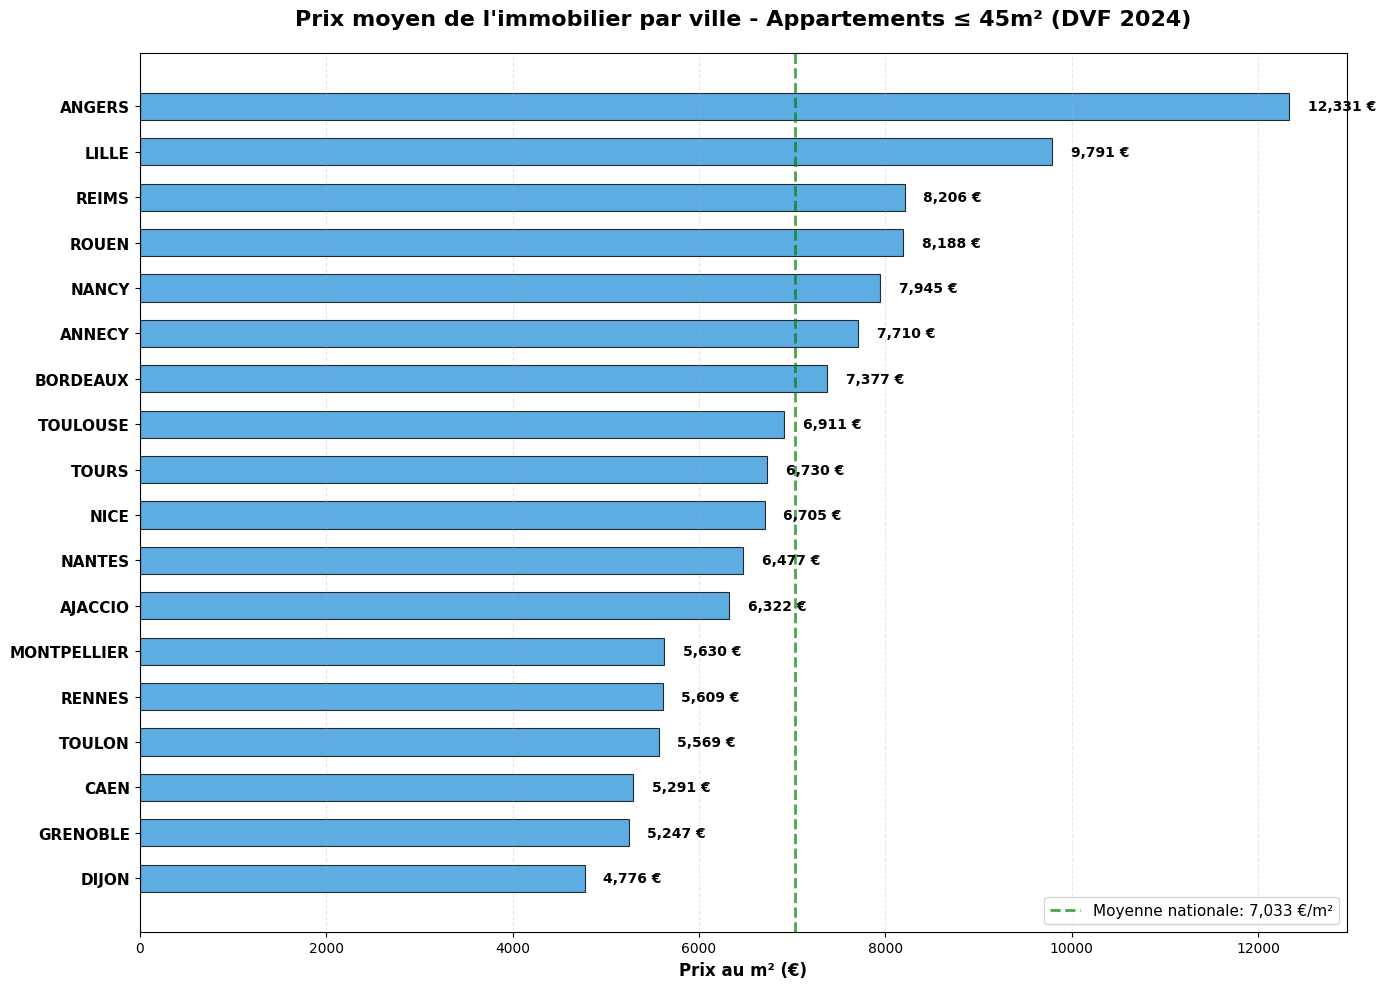

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier nettoy√©
df = pd.read_csv("dvf_appartements_23villes_0_45m2_nettoye.csv", low_memory=False)

print("="*80)
print("üìä CLASSEMENT DES VILLES PAR PRIX MOYEN AU M¬≤")
print("   Appartements ‚â§ 45m¬≤ - Donn√©es DVF 2024")
print("="*80)

# Calcul des statistiques par ville
stats_villes = df.groupby("Commune").agg({
    'Prix_m2': ['count', 'mean', 'min', 'max']
}).round(0)

# Renommer les colonnes pour plus de clart√©
stats_villes.columns = ['Nombre de ventes', 'Prix moyen ‚Ç¨/m¬≤', 'Prix min ‚Ç¨/m¬≤', 'Prix max ‚Ç¨/m¬≤']

# Trier par prix moyen d√©croissant
stats_villes = stats_villes.sort_values('Prix moyen ‚Ç¨/m¬≤', ascending=False)

# R√©initialiser l'index pour avoir la ville comme colonne
stats_villes = stats_villes.reset_index()

# Ajouter un rang
stats_villes.insert(0, 'Rang', range(1, len(stats_villes) + 1))

# Affichage du classement complet
print("\nüèÜ CLASSEMENT COMPLET (du plus cher au moins cher) :\n")
print(stats_villes.to_string(index=False))

# Statistiques globales
print("\n" + "="*80)
print("üìà STATISTIQUES GLOBALES")
print("="*80)
print(f"Nombre total de ventes analys√©es : {len(df):,}")
print(f"Nombre de villes : {len(stats_villes)}")
print(f"\nPrix moyen national : {df['Prix_m2'].mean():,.0f} ‚Ç¨/m¬≤")

# Top 5 et Bottom 5
print("\n" + "="*80)
print("ü•á TOP 5 - VILLES LES PLUS CH√àRES")
print("="*80)
top5 = stats_villes.head(5)[['Rang', 'Commune', 'Prix moyen ‚Ç¨/m¬≤', 'Nombre de ventes']]
for idx, row in top5.iterrows():
    print(f"{row['Rang']}. {row['Commune']:20s} : {row['Prix moyen ‚Ç¨/m¬≤']:>7,.0f} ‚Ç¨/m¬≤ - {row['Nombre de ventes']:.0f} ventes")

print("\n" + "="*80)
print("üéØ TOP 5 - VILLES LES MOINS CH√àRES")
print("="*80)
bottom5 = stats_villes.tail(5)[['Rang', 'Commune', 'Prix moyen ‚Ç¨/m¬≤', 'Nombre de ventes']]
for idx, row in bottom5.iterrows():
    print(f"{row['Rang']}. {row['Commune']:20s} : {row['Prix moyen ‚Ç¨/m¬≤']:>7,.0f} ‚Ç¨/m¬≤ - {row['Nombre de ventes']:.0f} ventes")

# Export du classement en CSV
stats_villes.to_csv("classement_prix_m2_par_ville.csv", index=False)
print("\n‚úÖ Classement export√© : classement_prix_m2_par_ville.csv")

# ==============================================================================
# GRAPHIQUE
# ==============================================================================

# Calcul des statistiques par ville pour le graphique
stats_villes_graph = df.groupby("Commune").agg({
    'Prix_m2': ['mean', 'count']
}).round(0)

stats_villes_graph.columns = ['Prix moyen ‚Ç¨/m¬≤', 'Nombre de ventes']
stats_villes_graph = stats_villes_graph.sort_values('Prix moyen ‚Ç¨/m¬≤', ascending=True)  # Tri croissant pour le graphique

# Cr√©ation de la figure
fig, ax = plt.subplots(figsize=(14, 10))

# Cr√©ation du graphique √† barres horizontales
villes = stats_villes_graph.index
prix_moyens = stats_villes_graph['Prix moyen ‚Ç¨/m¬≤']

y_pos = range(len(villes))

# Barres pour prix moyen uniquement
bars = ax.barh(y_pos, prix_moyens, height=0.6, color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.8)

# Ajout des valeurs sur les barres
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2, 
            f'{int(prix_moyens.iloc[i]):,} ‚Ç¨', 
            va='center', fontsize=10, fontweight='bold')

# Configuration des axes
ax.set_yticks(y_pos)
ax.set_yticklabels(villes, fontsize=11, fontweight='bold')
ax.set_xlabel('Prix au m¬≤ (‚Ç¨)', fontsize=12, fontweight='bold')
ax.set_title('Prix moyen de l\'immobilier par ville - Appartements ‚â§ 45m¬≤ (DVF 2024)', 
             fontsize=16, fontweight='bold', pad=20)

# Grille
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Ajout d'une ligne pour le prix moyen national
prix_moyen_national = df['Prix_m2'].mean()
ax.axvline(x=prix_moyen_national, color='green', linestyle='--', linewidth=2, 
           label=f'Moyenne nationale: {prix_moyen_national:,.0f} ‚Ç¨/m¬≤', alpha=0.7)
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()
plt.savefig('classement_prix_m2_villes.png', dpi=300, bbox_inches='tight')
print("\n‚úÖ Graphique sauvegard√© : classement_prix_m2_villes.png")
plt.show()

Partie Axel

In [ ]:

# ==============================================================================
# √âTAPE 2 : TRAITER LES FICHIERS DE LOYERS (OBSERVATOIRE DES LOYERS)
# ==============================================================================

# Chemin vers le dossier contenant les fichiers de loyers
dossier_loyers = r"https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main/data_loyer.zip"

# Liste pour stocker les r√©sultats
resultats_loyers = []

# Rechercher tous les fichiers CSV de loyers
fichiers_loyers = glob.glob(os.path.join(dossier_loyers, "Base_OP_*.csv"))

print(f"üîç {len(fichiers_loyers)} fichiers de loyers trouv√©s\n")

if len(fichiers_loyers) == 0:
    print("‚ùå Aucun fichier trouv√©. V√©rifie le chemin du dossier.")
else:
    for fichier in fichiers_loyers:
        try:
            # Extraire le nom du fichier sans le chemin
            nom_fichier = os.path.basename(fichier)
            
            # Extraire le nom de la ville du fichier
            parties = nom_fichier.replace('.csv', '').split('_')
            code_ville = parties[3] if len(parties) > 3 else "INCONNU"
            nom_ville = parties[4].upper() if len(parties) > 4 else "INCONNU"
            
            # Charger le fichier avec le bon s√©parateur (point-virgule)
            df_loyer = pd.read_csv(fichier, encoding='cp1252', sep=';', low_memory=False)
            
            # Nettoyer les noms de colonnes (enlever les espaces)
            df_loyer.columns = df_loyer.columns.str.strip()
            
            # Convertir loyer_moyen en num√©rique (remplacer virgule par point et espaces)
            if 'loyer_moyen' in df_loyer.columns:
                df_loyer['loyer_moyen'] = (
                    df_loyer['loyer_moyen']
                    .astype(str)
                    .str.replace(',', '.')
                    .str.replace(' ', '')
                    .replace('', None)
                )
                df_loyer['loyer_moyen'] = pd.to_numeric(df_loyer['loyer_moyen'], errors='coerce')
            
            # Convertir surface_moyenne en num√©rique
            if 'surface_moyenne' in df_loyer.columns:
                df_loyer['surface_moyenne'] = pd.to_numeric(df_loyer['surface_moyenne'], errors='coerce')
            
            # Convertir nombre_observations en num√©rique
            if 'nombre_observations' in df_loyer.columns:
                df_loyer['nombre_observations'] = pd.to_numeric(df_loyer['nombre_observations'], errors='coerce')
            
            # FILTRER : Appartements avec petites surfaces (‚â§ 45m¬≤)
            # On garde les 1P et 2P qui correspondent g√©n√©ralement √† ‚â§ 45m¬≤
            filtre = df_loyer[
                (
                    (df_loyer['Type_habitat'] == 'Appartement') |
                    (df_loyer['nombre_pieces_homogene'].isin(['Appart 1P', 'Appart 2P']))
                ) &
                (df_loyer['surface_moyenne'].notna()) &
                (df_loyer['surface_moyenne'] <= 45) &
                (df_loyer['loyer_moyen'].notna()) &
                (df_loyer['nombre_observations'].notna())
            ]
            
            if len(filtre) > 0:
                # Calculer le loyer moyen au m¬≤ pond√©r√© par le nombre d'observations
                loyer_moyen_m2 = (
                    (filtre['loyer_moyen'] * filtre['nombre_observations']).sum() / 
                    filtre['nombre_observations'].sum()
                )
                
                # Stocker les r√©sultats
                resultats_loyers.append({
                    'Ville': nom_ville,
                    'Code': code_ville,
                    'Loyer_moyen_m2': round(loyer_moyen_m2, 2),
                    'Nombre_observations': int(filtre['nombre_observations'].sum())
                })
                
                print(f"‚úÖ {nom_ville:25s} : {loyer_moyen_m2:6.2f} ‚Ç¨/m¬≤ ({int(filtre['nombre_observations'].sum()):,} obs)")
            else:
                print(f"‚ö†Ô∏è  {nom_ville:25s} : Pas de donn√©es pour appartements ‚â§ 45m¬≤")
        
        except Exception as e:
            print(f"‚ùå Erreur avec {nom_fichier}: {str(e)}")

    # Cr√©er un DataFrame avec les r√©sultats
    if len(resultats_loyers) > 0:
        df_loyers_villes = pd.DataFrame(resultats_loyers)
        
        # Trier par ville
        df_loyers_villes = df_loyers_villes.sort_values('Ville')
        
        # Afficher le r√©capitulatif
        print("\n" + "="*80)
        print("üìä R√âCAPITULATIF DES LOYERS PAR VILLE (Appartements ‚â§ 45m¬≤)")
        print("="*80)
        print(df_loyers_villes.to_string(index=False))
        
        # Exporter en CSV
        df_loyers_villes.to_csv("loyers_moyens_par_ville.csv", index=False)
        print("\n‚úÖ Fichier cr√©√© : loyers_moyens_par_ville.csv")
        
        # Statistiques globales
        print("\n" + "="*80)
        print("üìà STATISTIQUES GLOBALES")
        print("="*80)
        print(f"Nombre de villes analys√©es : {len(df_loyers_villes)}")
        print(f"Loyer moyen national : {df_loyers_villes['Loyer_moyen_m2'].mean():.2f} ‚Ç¨/m¬≤")
        print(f"Loyer m√©dian national : {df_loyers_villes['Loyer_moyen_m2'].median():.2f} ‚Ç¨/m¬≤")
        print(f"Loyer minimum : {df_loyers_villes['Loyer_moyen_m2'].min():.2f} ‚Ç¨/m¬≤")
        print(f"   ‚Üí {df_loyers_villes.loc[df_loyers_villes['Loyer_moyen_m2'].idxmin(), 'Ville']}")
        print(f"Loyer maximum : {df_loyers_villes['Loyer_moyen_m2'].max():.2f} ‚Ç¨/m¬≤")
        print(f"   ‚Üí {df_loyers_villes.loc[df_loyers_villes['Loyer_moyen_m2'].idxmax(), 'Ville']}")
    else:
        print("\n‚ùå Aucune donn√©e exploitable trouv√©e dans les fichiers.")

NameError: name 'glob' is not defined

‚úÖ Graphique sauvegard√© : loyers_moyens_par_ville.png


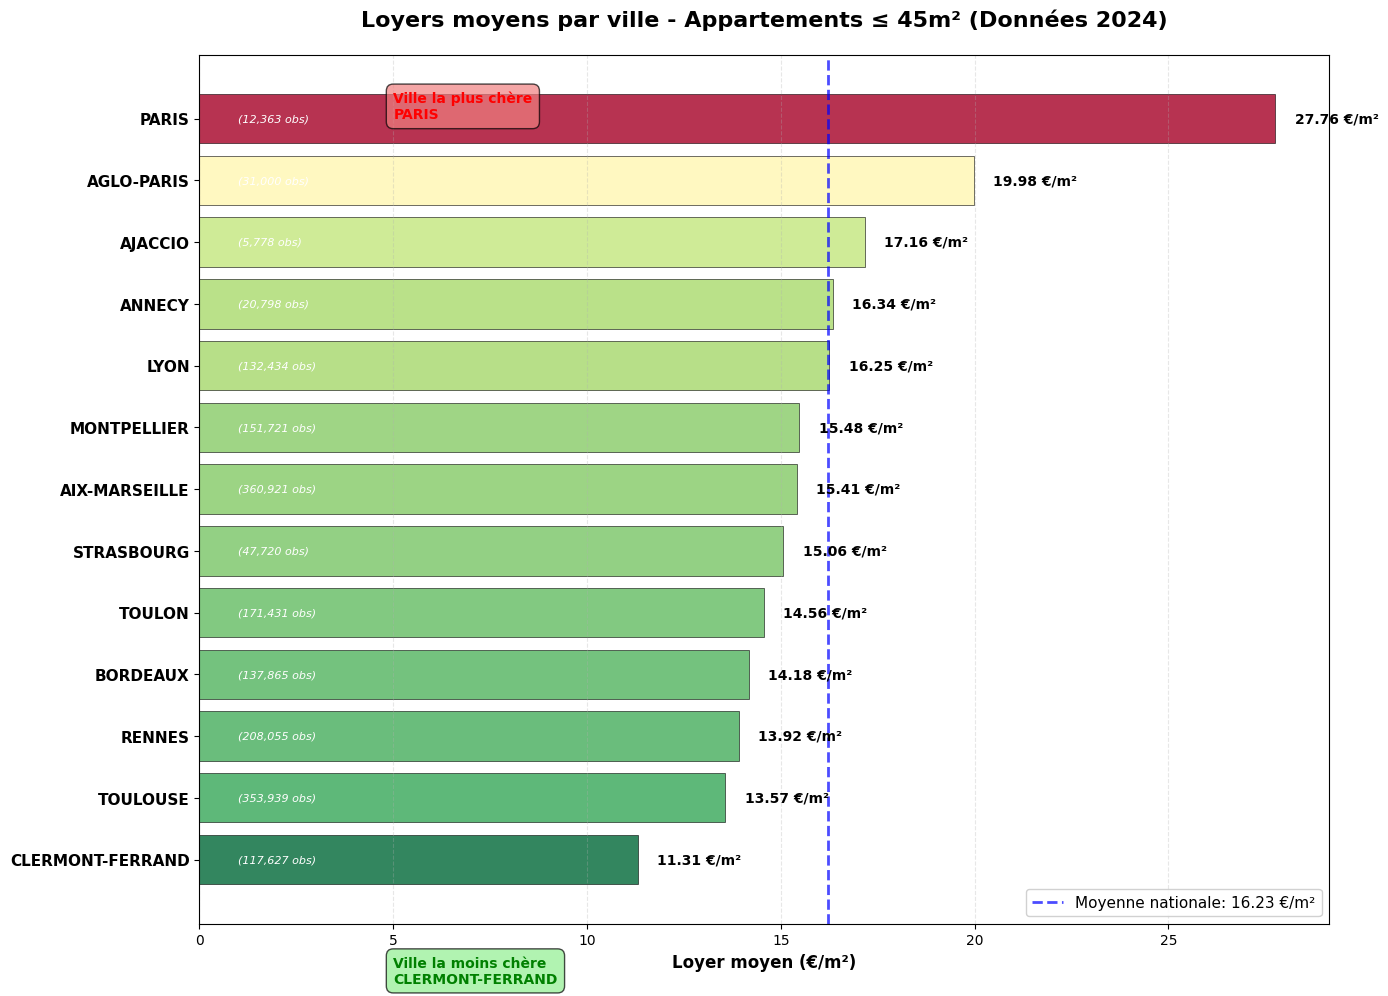

In [ ]:
# Lecture du fichier des loyers
df_loyers = pd.read_csv("loyers_moyens_par_ville.csv")

# Trier par loyer croissant pour le graphique
df_loyers = df_loyers.sort_values('Loyer_moyen_m2', ascending=True)

# Cr√©ation de la figure
fig, ax = plt.subplots(figsize=(14, 10))

# Cr√©ation du graphique √† barres horizontales
villes = df_loyers['Ville']
loyers = df_loyers['Loyer_moyen_m2']
observations = df_loyers['Nombre_observations']

y_pos = range(len(villes))

# Barres avec d√©grad√© de couleur selon le prix
colors = plt.cm.RdYlGn_r([(l - loyers.min()) / (loyers.max() - loyers.min()) for l in loyers])
bars = ax.barh(y_pos, loyers, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Ajout des valeurs sur les barres
for i, (bar, loyer, obs) in enumerate(zip(bars, loyers, observations)):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{loyer:.2f} ‚Ç¨/m¬≤', 
            va='center', fontsize=10, fontweight='bold')
    # Ajout du nombre d'observations √† gauche
    ax.text(1, bar.get_y() + bar.get_height()/2, 
            f'({obs:,} obs)', 
            va='center', ha='left', fontsize=8, color='white', style='italic')

# Configuration des axes
ax.set_yticks(y_pos)
ax.set_yticklabels(villes, fontsize=11, fontweight='bold')
ax.set_xlabel('Loyer moyen (‚Ç¨/m¬≤)', fontsize=12, fontweight='bold')
ax.set_title('Loyers moyens par ville - Appartements ‚â§ 45m¬≤ (Donn√©es 2024)', 
             fontsize=16, fontweight='bold', pad=20)

# Ajout de la grille
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Ligne pour le loyer moyen national
loyer_moyen_national = df_loyers['Loyer_moyen_m2'].mean()
ax.axvline(x=loyer_moyen_national, color='blue', linestyle='--', linewidth=2, 
           label=f'Moyenne nationale: {loyer_moyen_national:.2f} ‚Ç¨/m¬≤', alpha=0.7)

# L√©gende
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)

# Ajout d'annotations pour le min et max
min_ville = df_loyers.iloc[0]['Ville']
max_ville = df_loyers.iloc[-1]['Ville']
ax.annotate(f'Ville la moins ch√®re\n{min_ville}', 
            xy=(df_loyers.iloc[0]['Loyer_moyen_m2'], 0), 
            xytext=(5, -2),
            fontsize=10, color='green', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))
ax.annotate(f'Ville la plus ch√®re\n{max_ville}', 
            xy=(df_loyers.iloc[-1]['Loyer_moyen_m2'], len(villes)-1), 
            xytext=(5, len(villes)-1),
            fontsize=10, color='red', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

Objectif : calculer la rentabilit√© locative brute moyenne

La rentabilit√© locative brute se calcule ainsi :

Rentabilite brute (%) = (Loyer annuel/Prix d'achat)x100

Pour chaque ville : Rentabilit√© = (Loyer_moyen x 12)/(Prix_moyen_m^2 x Surface moyenne)



In [22]:

# Lecture du fichier de rentabilit√©
df_rentabilite = pd.read_csv("rentabilite_locative_par_ville.csv")

# Calcul du loyer annuel au m¬≤
df_rentabilite['Loyer_annuel_m2'] = (df_rentabilite['Loyer_moyen_m2'] * 12).round(2)

# Trier par rentabilit√© d√©croissante
df_rentabilite = df_rentabilite.sort_values('Rentabilite_brute_%', ascending=False)

# R√©initialiser l'index pour avoir un classement de 1 √† N
df_rentabilite = df_rentabilite.reset_index(drop=True)
df_rentabilite.insert(0, 'Rang', range(1, len(df_rentabilite) + 1))

print("="*120)
print("üí∞ CLASSEMENT COMPLET DES VILLES PAR RENTABILIT√â BRUTE")
print("   Appartements ‚â§ 45m¬≤ - Donn√©es 2024")
print("="*120)
print()

# Affichage format√© avec toutes les colonnes demand√©es
print(f"{'Rang':<5} {'Ville':<20} {'Rent. %':<10} {'Loyer/m¬≤':<12} {'Loyer annuel/m¬≤':<18} {'Prix achat/m¬≤':<15}")
print("-" * 120)

for idx, row in df_rentabilite.iterrows():
    print(f"{row['Rang']:<5} "
          f"{row['Commune']:<20} "
          f"{row['Rentabilite_brute_%']:>6.2f}%   "
          f"{row['Loyer_moyen_m2']:>8.2f} ‚Ç¨   "
          f"{row['Loyer_annuel_m2']:>12.2f} ‚Ç¨      "
          f"{row['Prix_achat_moyen_m2']:>10,.2f} ‚Ç¨")

print("="*120)

# Statistiques r√©capitulatives
print("\nüìä STATISTIQUES R√âCAPITULATIVES")
print("="*120)
print(f"{'M√©trique':<40} {'Minimum':<20} {'Moyenne':<20} {'Maximum':<20}")
print("-" * 120)
print(f"{'Rentabilit√© brute (%)':<40} "
      f"{df_rentabilite['Rentabilite_brute_%'].min():>6.2f}%          "
      f"{df_rentabilite['Rentabilite_brute_%'].mean():>6.2f}%          "
      f"{df_rentabilite['Rentabilite_brute_%'].max():>6.2f}%")
print(f"{'Loyer mensuel (‚Ç¨/m¬≤)':<40} "
      f"{df_rentabilite['Loyer_moyen_m2'].min():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Loyer_moyen_m2'].mean():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Loyer_moyen_m2'].max():>8.2f} ‚Ç¨")
print(f"{'Loyer annuel (‚Ç¨/m¬≤)':<40} "
      f"{df_rentabilite['Loyer_annuel_m2'].min():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Loyer_annuel_m2'].mean():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Loyer_annuel_m2'].max():>8.2f} ‚Ç¨")
print(f"{'Prix achat (‚Ç¨/m¬≤)':<40} "
      f"{df_rentabilite['Prix_achat_moyen_m2'].min():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Prix_achat_moyen_m2'].mean():>8.2f} ‚Ç¨        "
      f"{df_rentabilite['Prix_achat_moyen_m2'].max():>8.2f} ‚Ç¨")
print("="*120)

# TOP 3 et BOTTOM 3
print("\nüèÜ TOP 3 - VILLES LES PLUS RENTABLES")
print("="*120)
for idx, row in df_rentabilite.head(3).iterrows():
    print(f"\n{row['Rang']}. {row['Commune']}")
    print(f"   üí∞ Rentabilit√© brute    : {row['Rentabilite_brute_%']:.2f}%")
    print(f"   üìÖ Loyer mensuel/m¬≤     : {row['Loyer_moyen_m2']:.2f} ‚Ç¨")
    print(f"   üìÖ Loyer annuel/m¬≤      : {row['Loyer_annuel_m2']:.2f} ‚Ç¨")
    print(f"   üè† Prix achat/m¬≤        : {row['Prix_achat_moyen_m2']:,.2f} ‚Ç¨")
    print(f"   üìä Nombre de ventes     : {int(row['Nombre_ventes']):,}")

print("\n\nüìâ TOP 3 - VILLES LES MOINS RENTABLES")
print("="*120)
for idx, row in df_rentabilite.tail(3).iloc[::-1].iterrows():
    print(f"\n{row['Rang']}. {row['Commune']}")
    print(f"   üí∞ Rentabilit√© brute    : {row['Rentabilite_brute_%']:.2f}%")
    print(f"   üìÖ Loyer mensuel/m¬≤     : {row['Loyer_moyen_m2']:.2f} ‚Ç¨")
    print(f"   üìÖ Loyer annuel/m¬≤      : {row['Loyer_annuel_m2']:.2f} ‚Ç¨")
    print(f"   üè† Prix achat/m¬≤        : {row['Prix_achat_moyen_m2']:,.2f} ‚Ç¨")
    print(f"   üìä Nombre de ventes     : {int(row['Nombre_ventes']):,}")

print("\n" + "="*120)

üí∞ CLASSEMENT COMPLET DES VILLES PAR RENTABILIT√â BRUTE
   Appartements ‚â§ 45m¬≤ - Donn√©es 2024

Rang  Ville                Rent. %    Loyer/m¬≤     Loyer annuel/m¬≤    Prix achat/m¬≤  
------------------------------------------------------------------------------------------------------------------------
1     MONTPELLIER            3.30%      15.48 ‚Ç¨         185.76 ‚Ç¨        5,629.62 ‚Ç¨
2     AJACCIO                3.26%      17.16 ‚Ç¨         205.92 ‚Ç¨        6,322.45 ‚Ç¨
3     TOULON                 3.14%      14.56 ‚Ç¨         174.72 ‚Ç¨        5,569.40 ‚Ç¨
4     RENNES                 2.98%      13.92 ‚Ç¨         167.04 ‚Ç¨        5,608.53 ‚Ç¨
5     ANNECY                 2.54%      16.34 ‚Ç¨         196.08 ‚Ç¨        7,710.38 ‚Ç¨
6     TOULOUSE               2.36%      13.57 ‚Ç¨         162.84 ‚Ç¨        6,911.28 ‚Ç¨
7     BORDEAUX               2.31%      14.18 ‚Ç¨         170.16 ‚Ç¨        7,376.94 ‚Ç¨

üìä STATISTIQUES R√âCAPITULATIVES
M√©trique                     

‚úÖ Graphique sauvegard√© : analyse_rentabilite_finale.png


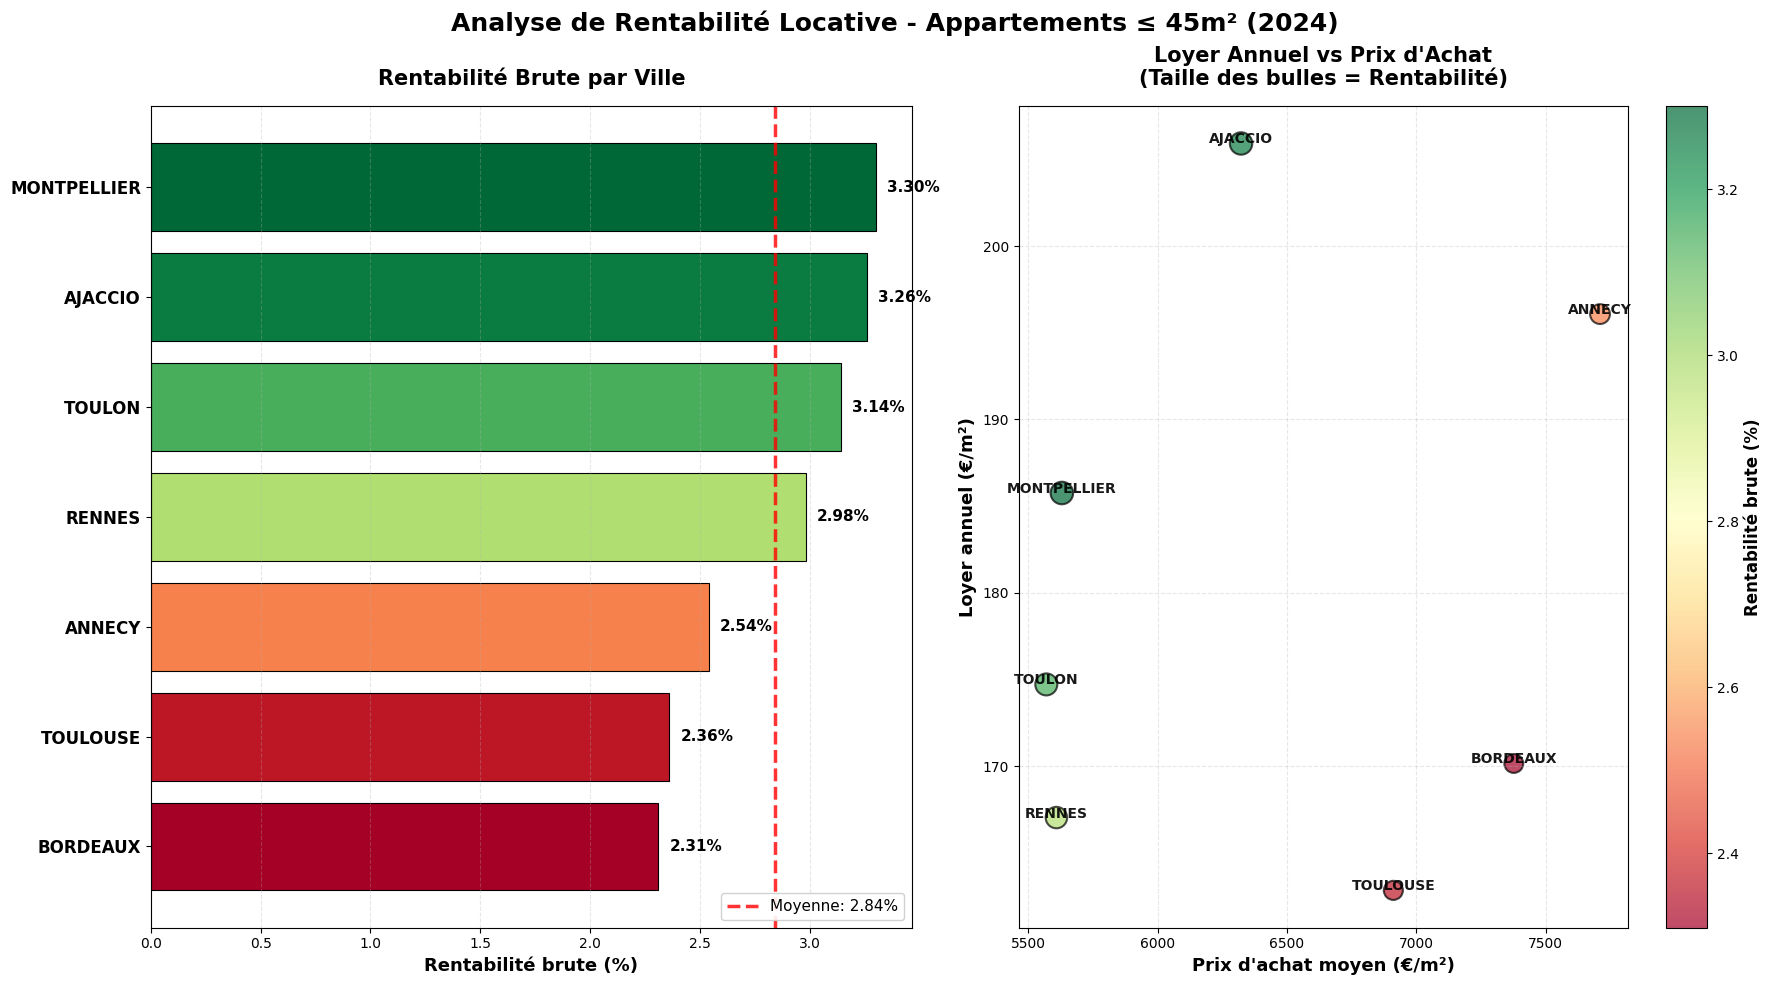

In [28]:
i# Lecture du fichier de rentabilit√©
df_rentabilite = pd.read_csv("rentabilite_locative_par_ville.csv")

# Calcul du loyer annuel au m¬≤
df_rentabilite['Loyer_annuel_m2'] = (df_rentabilite['Loyer_moyen_m2'] * 12).round(2)

# Trier par rentabilit√© d√©croissante
df_rentabilite = df_rentabilite.sort_values('Rentabilite_brute_%', ascending=True)  # Croissant pour le graphique

# ==============================================================================
# GRAPHIQUE : RENTABILIT√â LOCATIVE (2 graphiques c√¥te √† c√¥te)
# ==============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Analyse de Rentabilit√© Locative - Appartements ‚â§ 45m¬≤ (2024)', 
             fontsize=18, fontweight='bold', y=0.98)

# --- GRAPHIQUE 1 : Rentabilit√© brute par ville ---
ax1 = axes[0]
villes = df_rentabilite['Commune']
rentabilite = df_rentabilite['Rentabilite_brute_%']

colors = plt.cm.RdYlGn([(r - rentabilite.min()) / (rentabilite.max() - rentabilite.min()) for r in rentabilite])
bars1 = ax1.barh(range(len(villes)), rentabilite, color=colors, edgecolor='black', linewidth=0.8)

# Ajouter les valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars1, rentabilite)):
    ax1.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
            f'{val:.2f}%', va='center', fontsize=11, fontweight='bold')

ax1.set_yticks(range(len(villes)))
ax1.set_yticklabels(villes, fontsize=12, fontweight='bold')
ax1.set_xlabel('Rentabilit√© brute (%)', fontsize=13, fontweight='bold')
ax1.set_title('Rentabilit√© Brute par Ville', fontsize=15, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.axvline(x=rentabilite.mean(), color='red', linestyle='--', linewidth=2.5, alpha=0.8, 
           label=f'Moyenne: {rentabilite.mean():.2f}%')
ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)

# --- GRAPHIQUE 2 : Loyer ANNUEL vs Prix d'achat (Scatter) ---
ax2 = axes[1]
scatter = ax2.scatter(df_rentabilite['Prix_achat_moyen_m2'], 
                     df_rentabilite['Loyer_annuel_m2'],  # LOYER ANNUEL
                     s=df_rentabilite['Rentabilite_brute_%']*80,  # Taille selon rentabilit√©
                     c=df_rentabilite['Rentabilite_brute_%'],
                     cmap='RdYlGn',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=1.5)

# Ajouter les noms de villes
for idx, row in df_rentabilite.iterrows():
    ax2.annotate(row['Commune'], 
                (row['Prix_achat_moyen_m2'], row['Loyer_annuel_m2']),
                fontsize=10, ha='center', fontweight='bold', alpha=0.9)

ax2.set_xlabel('Prix d\'achat moyen (‚Ç¨/m¬≤)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Loyer annuel (‚Ç¨/m¬≤)', fontsize=13, fontweight='bold')
ax2.set_title('Loyer Annuel vs Prix d\'Achat\n(Taille des bulles = Rentabilit√©)', 
             fontsize=15, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Rentabilit√© brute (%)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('analyse_rentabilite_finale.png', dpi=300, bbox_inches='tight')
print("‚úÖ Graphique sauvegard√© : analyse_rentabilite_finale.png")
plt.show()